In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)})
pd.set_option('display.max_columns', 1500)
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from scipy.stats import spearmanr, pearsonr, kendalltau, pointbiserialr

In [2]:
df = pd.read_csv('train_age.csv', encoding="utf-8")
df.head()

C:\Users\lolit\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,target,CALCULATION_METHOD_ID,calls_count_in_weekdays,calls_duration_in_weekdays,calls_count_out_weekdays,calls_duration_out_weekdays,calls_count_in_weekends,calls_duration_in_weekends,calls_count_out_weekends,calls_duration_out_weekends,DATA_VOLUME_WEEKDAYS,DATA_VOLUME_WEEKENDS,LAT_HOME,LON_HOME,Oblast_post_HOME,Raion_post_HOME,City_post_HOME,lat_quad_home,lon_quad_home,LAT_WORK,LON_WORK,Oblast_post_WORK,Raion_post_WORK,City_post_WORK,lat_quad_work,lon_quad_work,device_brand,device_model,software_os_vendor,software_os_name,software_os_version,device_type_rus,sim_count,AVG_ARPU,ROUM,phone_value,SCORING,car,gender,lifetime,how_long_same_model,ecommerce_score,PRIVAT,OSCHADBANK,ALFABANK,UKRSOTBANK,OTP,UKRGASBANK,RAIFFEISEN,PIVDENNYI,IDEABANK,SBERBANK,MONOBANK,PRAVEXBANK,UKRSIB,banks_sms_count,SHELL,OKKO,SUNOIL,KLO,BRSM,AMIC,TNK,UPG,gas_stations_sms,fb_volume,fb_count,instagram_volume,intagram_count,viber_volume,viber_count,youtube_volume,youtube_count,google_volume,google_count,gmail_volume,gmail_count,skype_volume,skype_count,twitter_volume,twitter_count,dropbox_volume,dropbox_count,uber_volume,uber_count,steam_volume,steam_count,whatsapp_volume,whatsapp_count,itunes_volume,itunes_count,snapchat_volume,snapchat_count,linkedin_volume,linkedin_count,twitch_volume,twitch_count,tumblr_volume,tumblr_count,flickr_volume,flickr_count,badoo_volume,badoo_count,tinder_volume,tinder_count,netflix_volume,netflix_count,applemaps_volume,applemaps_count,msoffice365_volume,msoffice365_count,jabber_volume,jabber_count,telegram_volume,telegram_count,user_hash,Автосервис / Автотовары,Город / Власть,Дети_1,Другие услуги,Электроэнергия,Зоотовары_1,ИТ,Исскуство,Кафе и рестораны,Магазины Электроника,Магазины Питание,Магазины другое,Недвижимость_1,Оборудование / Инструмент,Образование,Одежда,Охрана,Перевозки,Почта_1,Профильное обучение,Работа,Реклама/PR,Ремонт и стройка,СМИ,Спорт и отдых,Студенчество,Транспорт_1,Туризм,Юр и фин услуги,азартные игры,бизнес-конслатинг,благортворительность,выставки,клининг,коллекторы,конслатинг,легкая промышленность,мебель,медицина,морской транспорт,небольшие производтсва,оптовые продажи,пищевая промышленность,развлечения,религия,ремонт товаров,рынки,садоводство,связь,сельское хазяйство,такси,торговые центры,тяжелая промышленность,уход за собой,MLM и заработок в сети,Авто-мото,Автомобиль и закон,Автомобильные издания,Автопорталы,Автосообщества,Автоспорт,Автострахование,Адреса и телефоны,Активный отдых,Аптека,Аптеки,Аудиотехника,Афиша,Безопасность,Бытовая техника,Вакансии и резюме,Ветеринария,Виды спорта,Временная и удаленная раб,Все для дома,Все для офиса,Все для праздника,Высшее образование,Газеты и журналы по труду,Где развлечься,Дети_2,Детский отдых,Дневники и фотоальбомы,Домашние животные,Домены и хостинг,Дополнительное образовани,Доски объявлений,Законы,Запчасти и аксессуары,Здоровый образ жизни,Знакомства,Зоотовары_2,"Игровые приставки, игры",Игры,Изобразительное искусство,Интернет издания,Интернет провайдеры,Интернет-издания,Интернет-кафе,Информационные агентства,Карты,Каталоги и поисковые сист,Квартира,Кино,Книги,Компьютерное ПО,Компьютерные издания,Компьютерные обои и заста,Компьютерные форумы,Компьютеры и комплектующи,Консультации специалистов,"Контактные линзы, оптика","Кофеварки, кофе, чай",Кулинария,Лечебные учреждения,Литература,Мебель,Медицинская помощь,Медицинские издания,Медицинские научные центр,Медицинские форумы,Медицинское страхование,Международные организации,Мобильные телефоны,Мода и красота,Мотоциклы,Музеи,Музыка,"Музыка, фильмы",Мягкие игрушки,Народная медицина,Науки,Начальное и среднее образ,Недвижимость_2,Непознанное,"Ноутбуки, КПК, коммуникат",Общественные организации,"Одежда, белье",Органы власти,Охота и рыбалка,Парфюмерия и косметика,Персональные страницы,Печатные издания,Погода,"Подарки, цветы, сувениры",Подготовка водителей,Поздравительные открытки,Поиск людей,Политика,Порталы,Портативная техника,Постельное белье,Почта_2,Праздники,Программирование,Продажа автомобилей,Продукты питания,Промыш

In [3]:
df['target'].value_counts()

4    60724
5    60373
3    40092
6    32544
2    10927
1     5340
Name: target, dtype: int64

<AxesSubplot:ylabel='Frequency'>

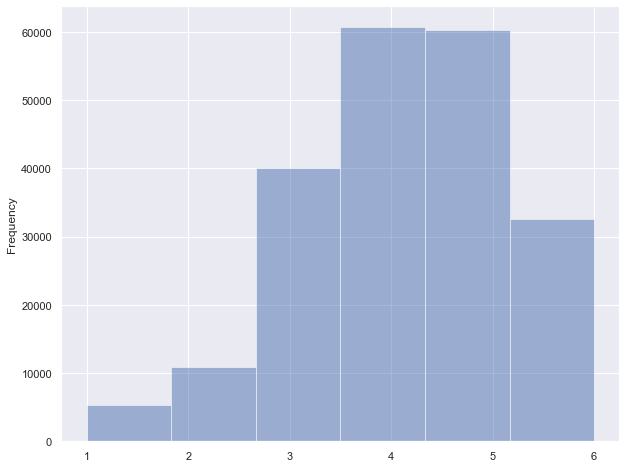

In [4]:
df['target'].plot.hist(bins=6, alpha=0.5)

1. Add 1st, 2nd groups data for class balance (+ after tests 3rd, 6th)

In [5]:
df_target_1 = df[df['target'] == 1]
df_target_2 = df[df['target'] == 2][:5500]
df_target_3 = df[df['target'] == 3][:5500]
df_target_6 = df[df['target'] == 6][:5500]
df_target_6.shape

(5500, 1294)

Cut initial dataset

In [6]:
# np.random.seed(10)

# remove_n = 190000
# drop_indices = np.random.choice(df.index, remove_n, replace=False)
# df_subset = df.drop(drop_indices)
# df_subset.to_csv('train_age_subset.csv', index=False)
df_subset = pd.read_csv('train_age_subset.csv')

C:\Users\lolit\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
df_subset = df_subset[df_subset['target'] != 1]
df_subset = df_subset[df_subset['target'] != 2]
df_subset = df_subset[df_subset['target'] != 3]
df_subset = df_subset[df_subset['target'] != 6]
df_subset.shape

(11481, 1294)

In [8]:
df_subset = df_subset.append(df_target_1, ignore_index = True)
df_subset = df_subset.append(df_target_2, ignore_index = True)
df_subset = df_subset.append(df_target_3, ignore_index = True)
df_subset = df_subset.append(df_target_6, ignore_index = True)
df_subset.shape

(33321, 1294)

In [9]:
from sklearn.utils import shuffle
df_subset = shuffle(df_subset)
df_subset.tail()

,target,CALCULATION_METHOD_ID,calls_count_in_weekdays,calls_duration_in_weekdays,calls_count_out_weekdays,calls_duration_out_weekdays,calls_count_in_weekends,calls_duration_in_weekends,calls_count_out_weekends,calls_duration_out_weekends,DATA_VOLUME_WEEKDAYS,DATA_VOLUME_WEEKENDS,LAT_HOME,LON_HOME,Oblast_post_HOME,Raion_post_HOME,City_post_HOME,lat_quad_home,lon_quad_home,LAT_WORK,LON_WORK,Oblast_post_WORK,Raion_post_WORK,City_post_WORK,lat_quad_work,lon_quad_work,device_brand,device_model,software_os_vendor,software_os_name,software_os_version,device_type_rus,sim_count,AVG_ARPU,ROUM,phone_value,SCORING,car,gender,lifetime,how_long_same_model,ecommerce_score,PRIVAT,OSCHADBANK,ALFABANK,UKRSOTBANK,OTP,UKRGASBANK,RAIFFEISEN,PIVDENNYI,IDEABANK,SBERBANK,MONOBANK,PRAVEXBANK,UKRSIB,banks_sms_count,SHELL,OKKO,SUNOIL,KLO,BRSM,AMIC,TNK,UPG,gas_stations_sms,fb_volume,fb_count,instagram_volume,intagram_count,viber_volume,viber_count,youtube_volume,youtube_count,google_volume,google_count,gmail_volume,gmail_count,skype_volume,skype_count,twitter_volume,twitter_count,dropbox_volume,dropbox_count,uber_volume,uber_count,steam_volume,steam_count,whatsapp_volume,whatsapp_count,itunes_volume,itunes_count,snapchat_volume,snapchat_count,linkedin_volume,linkedin_count,twitch_volume,twitch_count,tumblr_volume,tumblr_count,flickr_volume,flickr_count,badoo_volume,badoo_count,tinder_volume,tinder_count,netflix_volume,netflix_count,applemaps_volume,applemaps_count,msoffice365_volume,msoffice365_count,jabber_volume,jabber_count,telegram_volume,telegram_count,user_hash,Автосервис / Автотовары,Город / Власть,Дети_1,Другие услуги,Электроэнергия,Зоотовары_1,ИТ,Исскуство,Кафе и рестораны,Магазины Электроника,Магазины Питание,Магазины другое,Недвижимость_1,Оборудование / Инструмент,Образование,Одежда,Охрана,Перевозки,Почта_1,Профильное обучение,Работа,Реклама/PR,Ремонт и стройка,СМИ,Спорт и отдых,Студенчество,Транспорт_1,Туризм,Юр и фин услуги,азартные игры,бизнес-конслатинг,благортворительность,выставки,клининг,коллекторы,конслатинг,легкая промышленность,мебель,медицина,морской транспорт,небольшие производтсва,оптовые продажи,пищевая промышленность,развлечения,религия,ремонт товаров,рынки,садоводство,связь,сельское хазяйство,такси,торговые центры,тяжелая промышленность,уход за собой,MLM и заработок в сети,Авто-мото,Автомобиль и закон,Автомобильные издания,Автопорталы,Автосообщества,Автоспорт,Автострахование,Адреса и телефоны,Активный отдых,Аптека,Аптеки,Аудиотехника,Афиша,Безопасность,Бытовая техника,Вакансии и резюме,Ветеринария,Виды спорта,Временная и удаленная раб,Все для дома,Все для офиса,Все для праздника,Высшее образование,Газеты и журналы по труду,Где развлечься,Дети_2,Детский отдых,Дневники и фотоальбомы,Домашние животные,Домены и хостинг,Дополнительное образовани,Доски объявлений,Законы,Запчасти и аксессуары,Здоровый образ жизни,Знакомства,Зоотовары_2,"Игровые приставки, игры",Игры,Изобразительное искусство,Интернет издания,Интернет провайдеры,Интернет-издания,Интернет-кафе,Информационные агентства,Карты,Каталоги и поисковые сист,Квартира,Кино,Книги,Компьютерное ПО,Компьютерные издания,Компьютерные обои и заста,Компьютерные форумы,Компьютеры и комплектующи,Консультации специалистов,"Контактные линзы, оптика","Кофеварки, кофе, чай",Кулинария,Лечебные учреждения,Литература,Мебель,Медицинская помощь,Медицинские издания,Медицинские научные центр,Медицинские форумы,Медицинское страхование,Международные организации,Мобильные телефоны,Мода и красота,Мотоциклы,Музеи,Музыка,"Музыка, фильмы",Мягкие игрушки,Народная медицина,Науки,Начальное и среднее образ,Недвижимость_2,Непознанное,"Ноутбуки, КПК, коммуникат",Общественные организации,"Одежда, белье",Органы власти,Охота и рыбалка,Парфюмерия и косметика,Персональные страницы,Печатные издания,Погода,"Подарки, цветы, сувениры",Подготовка водителей,Поздравительные открытки,Поиск людей,Политика,Порталы,Портативная техника,Постельное белье,Почта_2,Праздники,Программирование,Продажа автомобилей,Продукты питания,Промыш

In [10]:
df_subset['target'].value_counts()

4    5810
5    5671
2    5500
3    5500
6    5500
1    5340
Name: target, dtype: int64

In [11]:
df_subset.to_csv('train_age_subset_norm.csv', index=False)

In [12]:
df_subset = df_subset.dropna(thresh=1000)
df_subset.shape

(31913, 1294)

In [13]:
df_subset['target'].value_counts()

4    5505
5    5441
2    5385
6    5304
3    5281
1    4997
Name: target, dtype: int64

<AxesSubplot:ylabel='Frequency'>

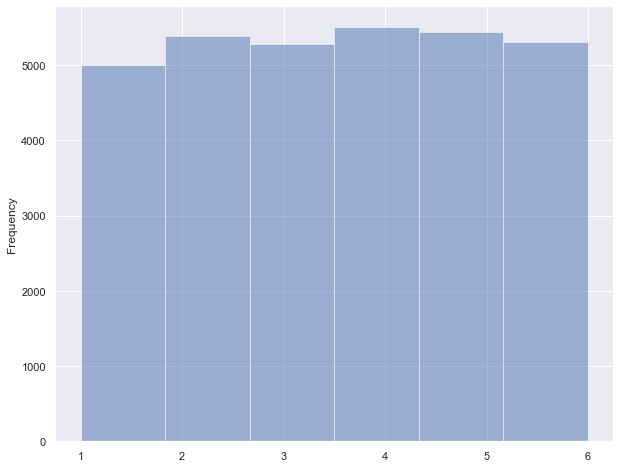

In [14]:
df_subset['target'].plot.hist(bins=6, alpha=0.5)

2. Columns selection; numeric by correlation; text data - just separate

In [15]:
def check_correlation_data(target_col_name, col_to_be_checked, threshh=0.08, p_val_thres=0.00001):

    try:
        r_pearson = pearsonr(df[target_col_name], df[col_to_be_checked])
        r_kendall = kendalltau(df[target_col_name], df[col_to_be_checked])
        r_pointbit = pointbiserialr(df[target_col_name], df[col_to_be_checked])
        r_spearman = spearmanr(df[target_col_name], df[col_to_be_checked])
        # print('Pearson correlation:', r_pearson[0], 
        # 'p-value:', r_pearson[1])
        # print('Kendall check:', r_kendall[0], 
        # 'p-value:', r_kendall[1])
        # print('PointBitserial check:', r_pointbit[0], 
        # 'p-value:', r_pointbit[1])
        # print('Spearman check:', r_spearman[0], 
        # 'p-value:', r_spearman[1])
        corr_data = np.array([r_pearson[0], r_kendall[0], r_pointbit[0], r_spearman[0]])
        # corr_data = np.ndarray([np.abs(r_pearson[0]), np.abs(r_kendall[0]), np.abs(r_pointbit[0]), np.abs(r_spearman[0])])
        pval_data = np.array([r_pearson[1], r_kendall[1], r_pointbit[1], r_spearman[1]])
        return True if (np.abs(np.mean(corr_data)) > threshh and np.mean(pval_data) < p_val_thres) else False
    except ValueError:
        data_ch = df[col_to_be_checked].iloc[:20]

        for i in data_ch:
            print(type(i), i)
        raise ValueError
    # return r_pearson, r_kendall, r_pointbit, r_spearman


In [16]:
replace_dict = {'Кафе и рестораны': 'cafe',
                    'развлечения': 'entertain',
                    'Где развлечься': 'where_fun',
                    'Интернет издания': 'internet_mag',
                    'Порталы': 'portals',
                    'Путешествия и туризм': 'tourism', 
                    'Услуги':'services'}

In [17]:
numeric_corr_columns = np.array([])
text_columns = np.array([])
for col_i in df_subset.columns:
    # print(col_i)
    # print('Is string type:', is_string_dtype(df[col_i]))
    # print('Is numeric type:', is_numeric_dtype(df[col_i]))
    if is_numeric_dtype(df[col_i]):
        df[col_i].replace(np.nan, 0, inplace=True)
        if check_correlation_data('target', col_i):
            numeric_corr_columns = np.append(numeric_corr_columns, col_i)
    else:
        text_columns = np.append(text_columns, col_i)

C:\Users\lolit\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
C:\Users\lolit\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\lolit\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [18]:
print(numeric_corr_columns)

['target' 'CALCULATION_METHOD_ID' 'calls_count_in_weekdays'
 'DATA_VOLUME_WEEKDAYS' 'DATA_VOLUME_WEEKENDS' 'AVG_ARPU' 'phone_value'
 'lifetime' 'how_long_same_model' 'ecommerce_score' 'MONOBANK' 'fb_volume'
 'fb_count' 'instagram_volume' 'intagram_count' 'viber_volume'
 'viber_count' 'youtube_volume' 'youtube_count' 'google_volume'
 'google_count' 'gmail_volume' 'gmail_count' 'skype_volume' 'skype_count'
 'twitter_volume' 'twitter_count' 'whatsapp_count' 'itunes_volume'
 'itunes_count' 'snapchat_volume' 'snapchat_count' 'linkedin_volume'
 'linkedin_count' 'badoo_count' 'applemaps_volume' 'applemaps_count'
 'Кафе и рестораны' 'развлечения' 'Где развлечься' 'Интернет издания'
 'Порталы' 'Путешествия и туризм' 'Услуги' '1020' '370' '4659' '5724'
 'Apple' 'CITRUS.UA' 'FACEBOOK' 'Google' 'Instagram' 'NESCAFE 3v'
 'NovaPoshta' 'OLX' 'Tachku' 'Telegram' 'V B' 'VKcom' 'Viber' 'monobank'
 'uklon']


In [19]:

def replace_with_dict(ar, dic):
    temp = []
    for name in ar:
        if name in dic:
            temp.append(dic[name])
        else:
            temp.append(name)
    return temp
numeric_corr_columns = replace_with_dict(numeric_corr_columns, replace_dict)
print(numeric_corr_columns)

['target', 'CALCULATION_METHOD_ID', 'calls_count_in_weekdays', 'DATA_VOLUME_WEEKDAYS', 'DATA_VOLUME_WEEKENDS', 'AVG_ARPU', 'phone_value', 'lifetime', 'how_long_same_model', 'ecommerce_score', 'MONOBANK', 'fb_volume', 'fb_count', 'instagram_volume', 'intagram_count', 'viber_volume', 'viber_count', 'youtube_volume', 'youtube_count', 'google_volume', 'google_count', 'gmail_volume', 'gmail_count', 'skype_volume', 'skype_count', 'twitter_volume', 'twitter_count', 'whatsapp_count', 'itunes_volume', 'itunes_count', 'snapchat_volume', 'snapchat_count', 'linkedin_volume', 'linkedin_count', 'badoo_count', 'applemaps_volume', 'applemaps_count', 'cafe', 'entertain', 'where_fun', 'internet_mag', 'portals', 'tourism', 'services', '1020', '370', '4659', '5724', 'Apple', 'CITRUS.UA', 'FACEBOOK', 'Google', 'Instagram', 'NESCAFE 3v', 'NovaPoshta', 'OLX', 'Tachku', 'Telegram', 'V B', 'VKcom', 'Viber', 'monobank', 'uklon']


In [20]:
df_subset.rename(columns=replace_dict, inplace=True)

<AxesSubplot:xlabel='DATA_VOLUME_WEEKDAYS'>

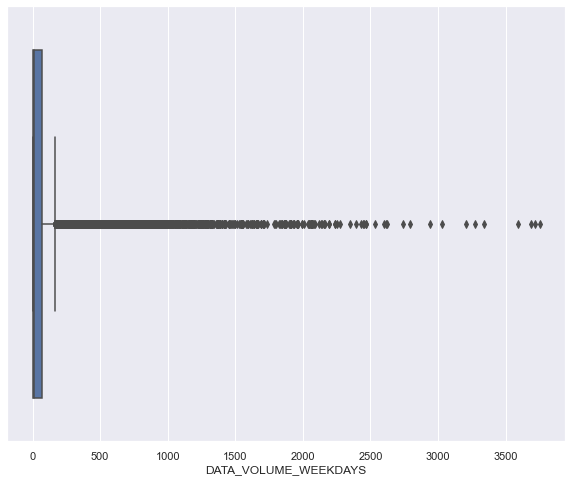

In [22]:
sns.boxplot(x=df_subset['DATA_VOLUME_WEEKDAYS'])

In [23]:
from scipy import stats
df_subset = df_subset[(np.abs(stats.zscore(df_subset['DATA_VOLUME_WEEKDAYS'])) < 2)]
df_subset = df_subset[(np.abs(stats.zscore(df_subset['fb_count'])) < 2)]
df_subset.shape

(29449, 1294)

<AxesSubplot:xlabel='DATA_VOLUME_WEEKDAYS'>

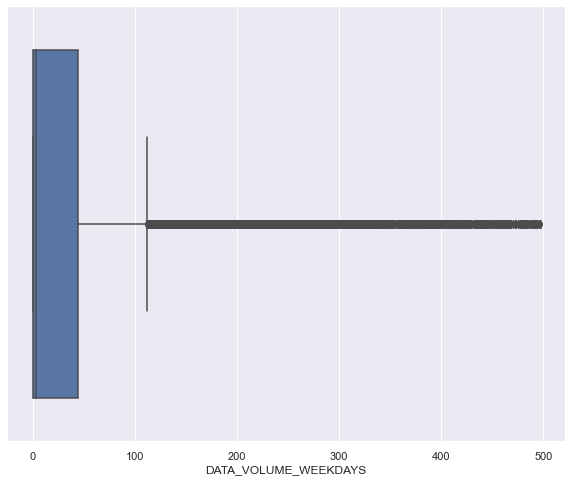

In [24]:
sns.boxplot(x=df_subset['DATA_VOLUME_WEEKDAYS'])

<AxesSubplot:xlabel='fb_count'>

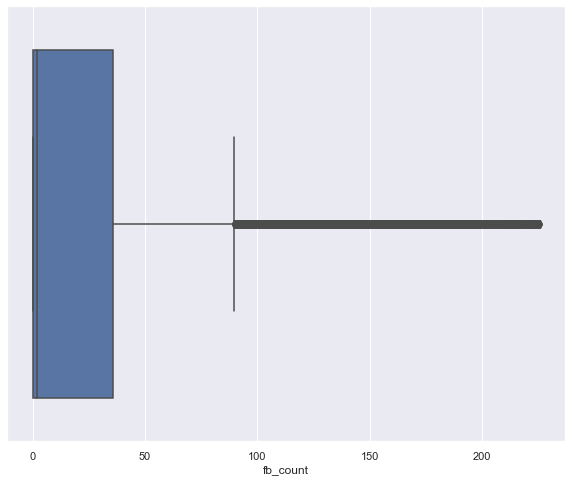

In [25]:
sns.boxplot(x=df_subset['fb_count'])

<AxesSubplot:ylabel='Frequency'>

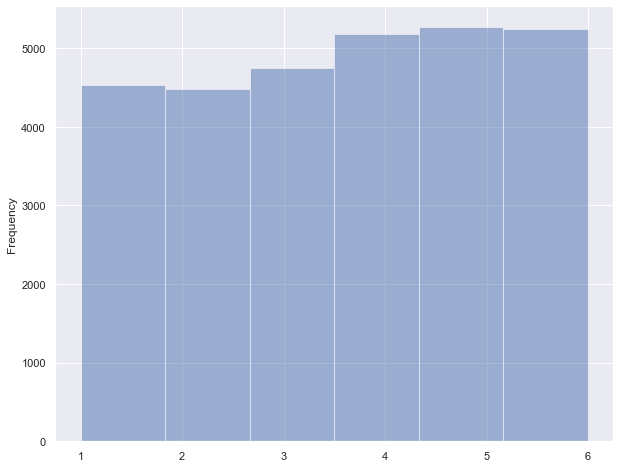

In [26]:
df_subset['target'].plot.hist(bins=6, alpha=0.5)

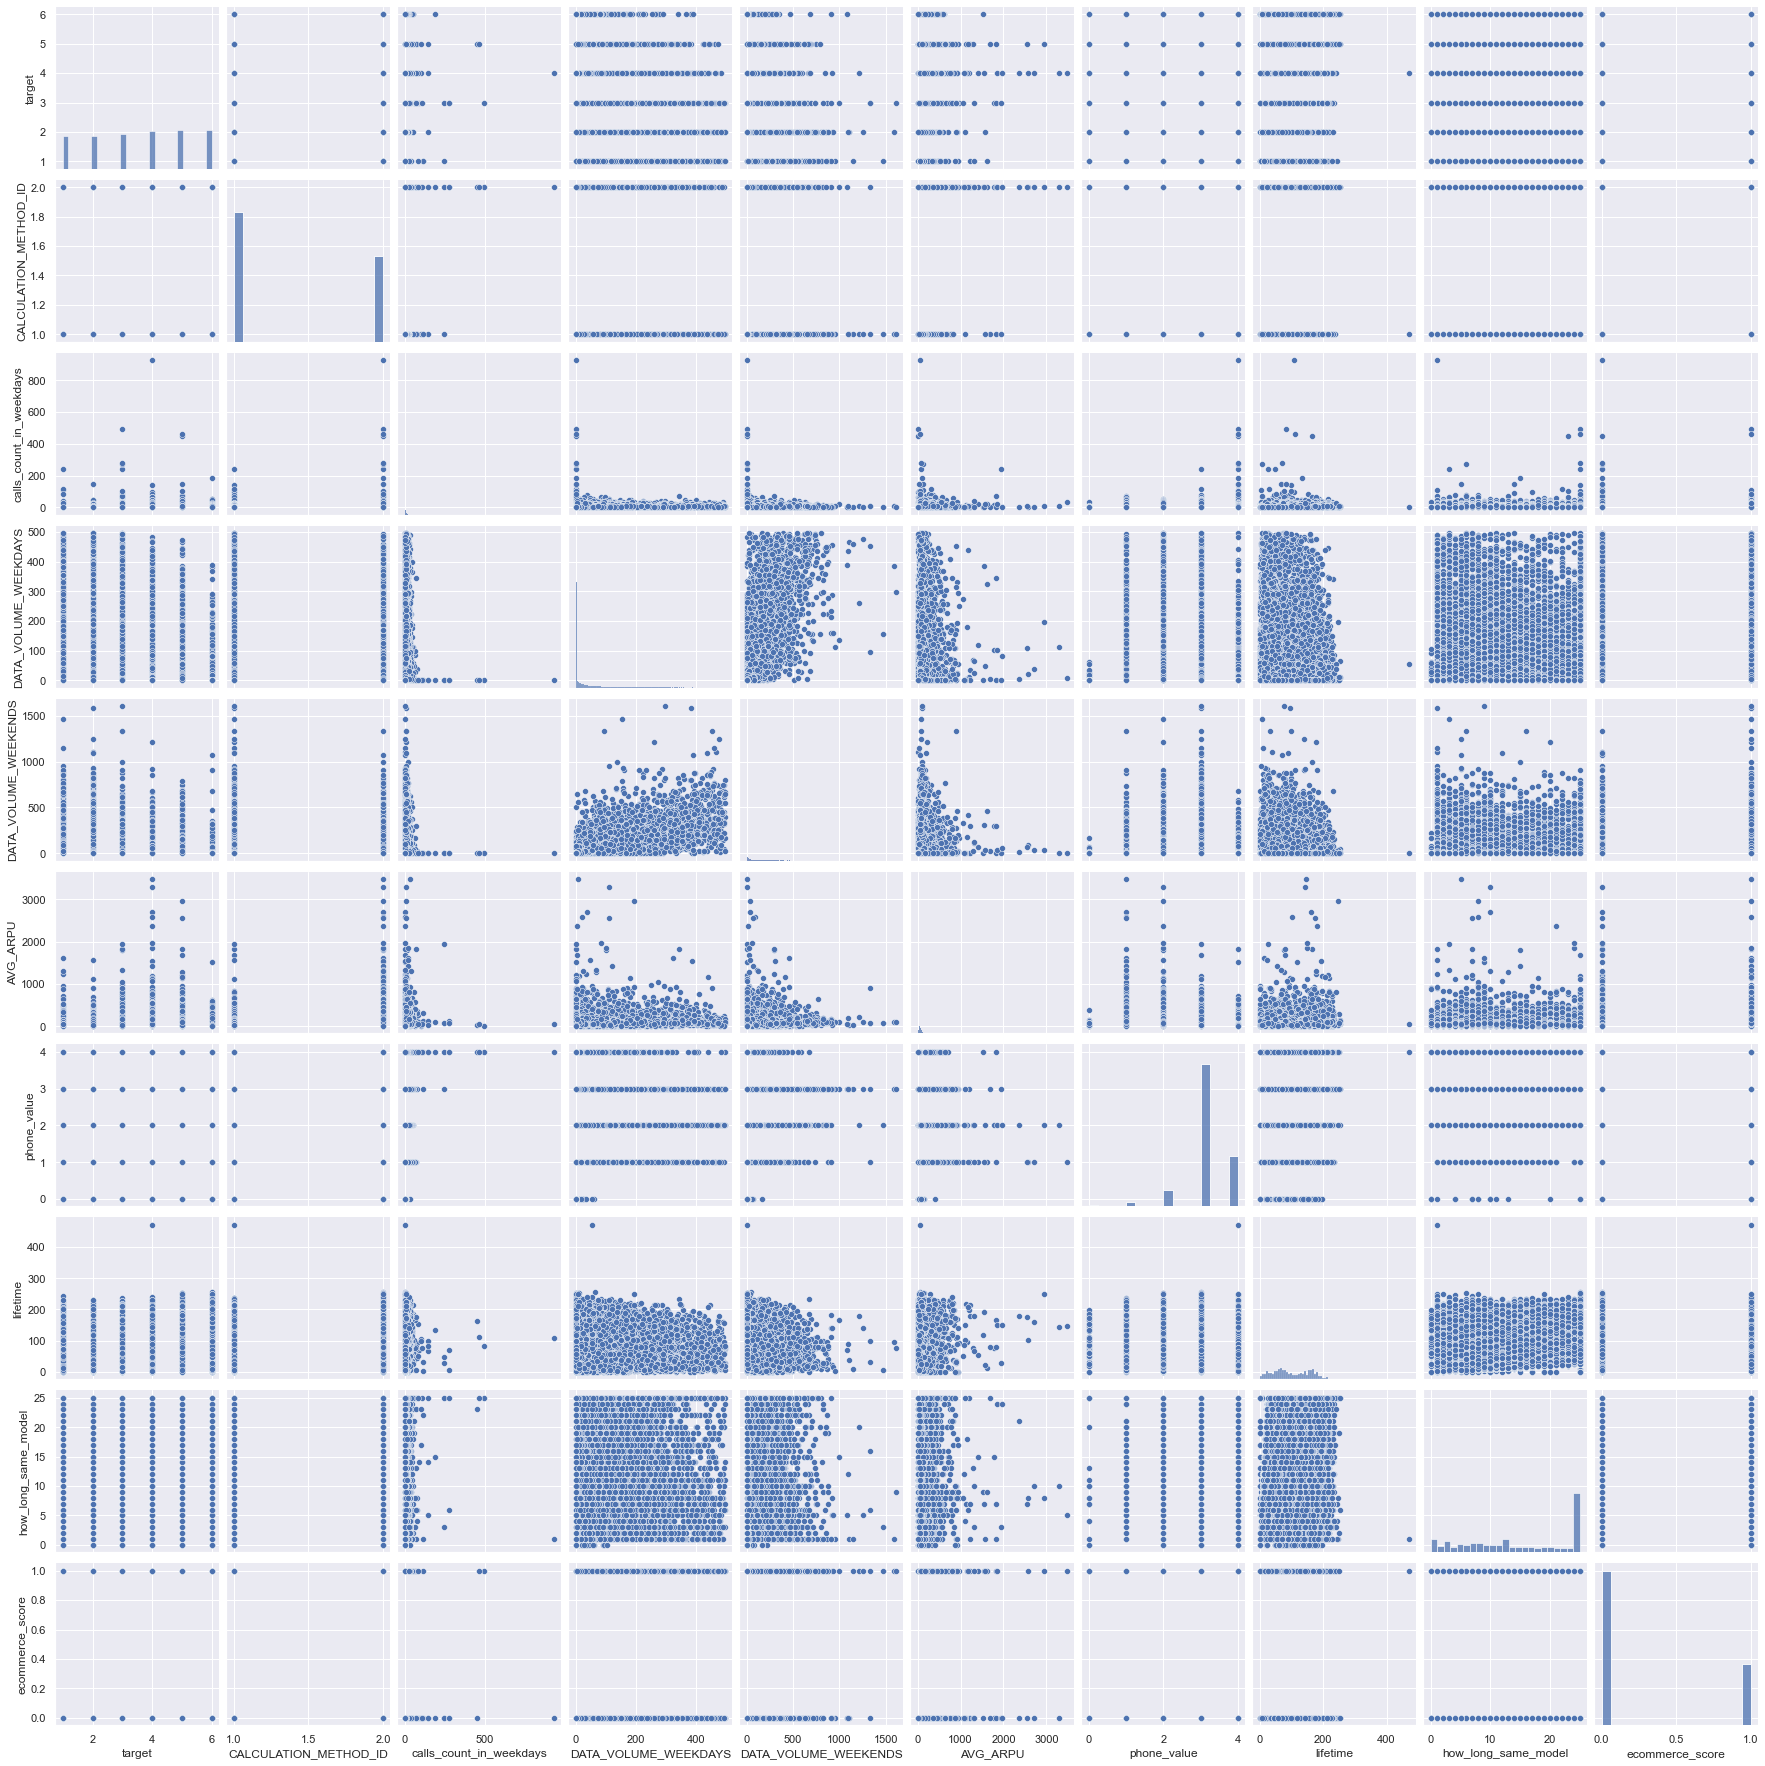

In [28]:
sns.pairplot(df_subset[numeric_corr_columns[:10]])

In [29]:
# removed text columns with non relevant/ bad data
text_columns = text_columns[(text_columns != 'user_hash') & (text_columns != 'device_model')]
print(text_columns)

['Oblast_post_HOME' 'Raion_post_HOME' 'City_post_HOME' 'Oblast_post_WORK'
 'Raion_post_WORK' 'City_post_WORK' 'device_brand' 'software_os_vendor'
 'software_os_name' 'software_os_version' 'device_type_rus' 'SCORING']


In [30]:
model_candidates_columns = np.append(numeric_corr_columns, text_columns)
model_candidates_columns

array(['target', 'CALCULATION_METHOD_ID', 'calls_count_in_weekdays',
       'DATA_VOLUME_WEEKDAYS', 'DATA_VOLUME_WEEKENDS', 'AVG_ARPU',
       'phone_value', 'lifetime', 'how_long_same_model',
       'ecommerce_score', 'MONOBANK', 'fb_volume', 'fb_count',
       'instagram_volume', 'intagram_count', 'viber_volume',
       'viber_count', 'youtube_volume', 'youtube_count', 'google_volume',
       'google_count', 'gmail_volume', 'gmail_count', 'skype_volume',
       'skype_count', 'twitter_volume', 'twitter_count', 'whatsapp_count',
       'itunes_volume', 'itunes_count', 'snapchat_volume',
       'snapchat_count', 'linkedin_volume', 'linkedin_count',
       'badoo_count', 'applemaps_volume', 'applemaps_count', 'cafe',
       'entertain', 'where_fun', 'internet_mag', 'portals', 'tourism',
       'services', '1020', '370', '4659', '5724', 'Apple', 'CITRUS.UA',
       'FACEBOOK', 'Google', 'Instagram', 'NESCAFE 3v', 'NovaPoshta',
       'OLX', 'Tachku', 'Telegram', 'V B', 'VKcom', 'Viber', 

In [31]:
df_subset_cols_truncated = df_subset.loc[:, model_candidates_columns]
df_subset_cols_truncated.head()
df_subset_cols_truncated.shape

(29449, 75)

Value count check to define future threshold

In [69]:
for col_i in text_columns:
    print(col_i)
    print(df_subset_cols_truncated[col_i].value_counts())

Oblast_post_HOME
Київ                    4235
Харківська              3066
Дніпропетровська        2406
Краматорська філія      1625
Запорізька              1558
Київська                1546
Одеська                 1455
Луганська               1301
Херсонська              1190
Полтавська              1188
Донецька                1077
0                       1019
Сумська                  961
Львівська                779
Миколаївська             687
Івано-Франківська        661
Закарпатська             646
Кіровоградська           636
Сєвєродонецька філія     589
Чернівецька              570
Волинська                569
Чернігівська             415
Рівненська               291
Черкаська                288
Житомирська              180
Тернопільська            146
Криворізька філія        141
Вінницька                133
Хмельницька               91
Name: Oblast_post_HOME, dtype: int64
Oblast_post_WORK
Київ                    4540
Харківська              3082
Дніпропетровська        2449
К

Visualizations to make decision what columns will go further/ or which one looks similar

<class 'pandas.core.series.Series'>


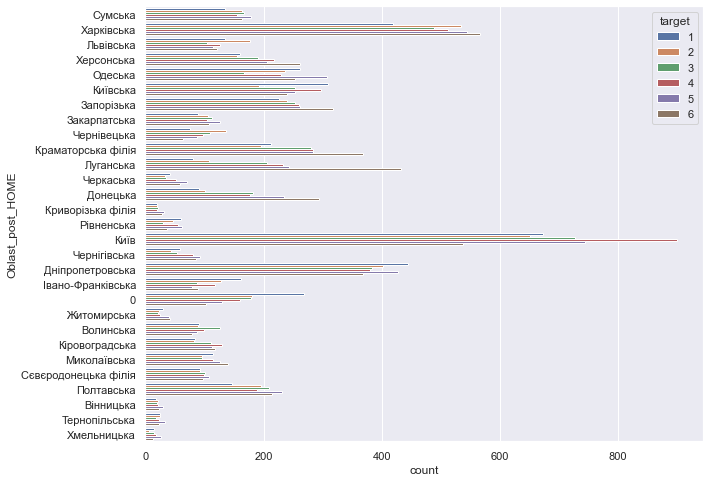

In [33]:
sns.countplot(y='Oblast_post_HOME', hue='target', data=df_subset_cols_truncated)
print(type(df_subset_cols_truncated['Oblast_post_HOME'].value_counts()))

<AxesSubplot:xlabel='count', ylabel='Oblast_post_WORK'>

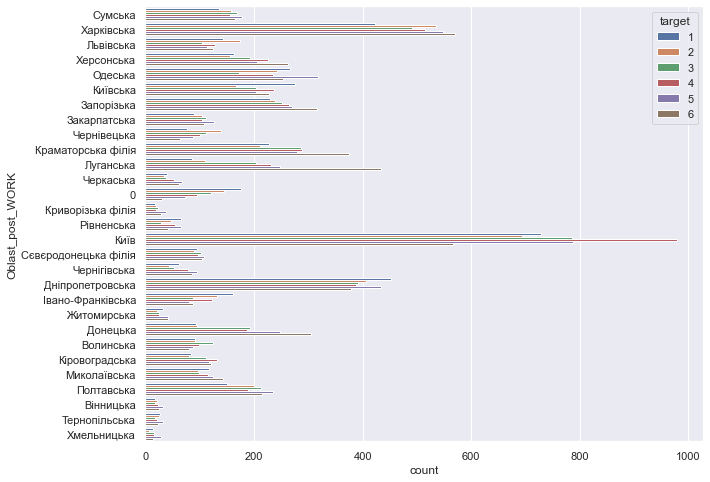

In [34]:
sns.countplot(y='Oblast_post_WORK', hue='target', data=df_subset_cols_truncated)

<AxesSubplot:xlabel='count', ylabel='software_os_name'>

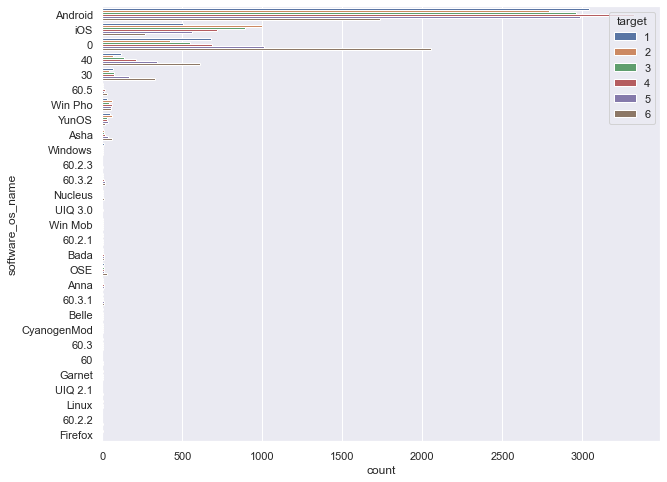

In [35]:
sns.countplot(y='software_os_name', hue='target', data=df_subset_cols_truncated)

<AxesSubplot:xlabel='count', ylabel='SCORING'>

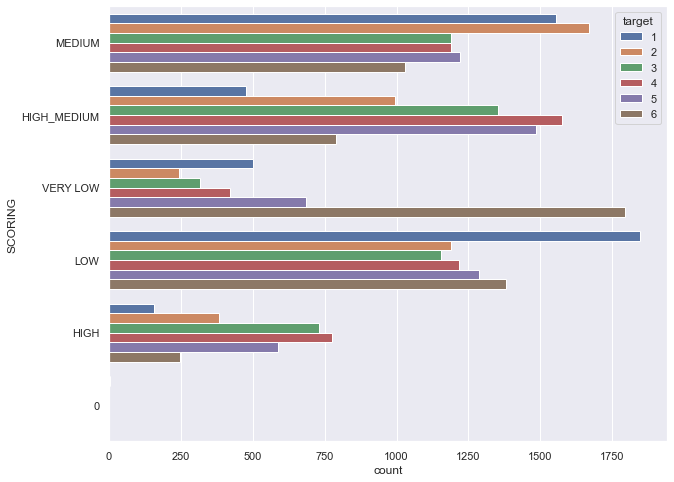

In [36]:
sns.countplot(y='SCORING', hue='target', data=df_subset_cols_truncated)

<AxesSubplot:xlabel='count', ylabel='device_type_rus'>

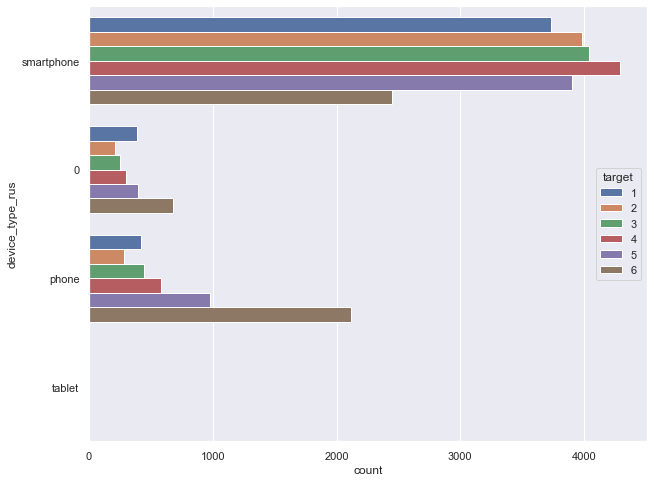

In [37]:
sns.countplot(y='device_type_rus', hue='target', data=df_subset_cols_truncated)

In [38]:
model_candidates_columns = model_candidates_columns[(model_candidates_columns != 'Raion_post_HOME') & (model_candidates_columns != 'City_post_HOME') 
                                                        & (model_candidates_columns != 'Raion_post_WORK') & (model_candidates_columns != 'City_post_WORK')]
text_columns = text_columns[(text_columns != 'Raion_post_HOME') & (text_columns != 'City_post_HOME') 
                                                        & (text_columns != 'Raion_post_WORK') & (text_columns != 'City_post_WORK')]
df_subset_cols_truncated_mod = df_subset_cols_truncated.loc[:, model_candidates_columns]
df_subset_cols_truncated_mod.head()
df_subset_cols_truncated_mod.shape

(29449, 71)

In [39]:
df_subset_cols_truncated_mod = df_subset_cols_truncated_mod.loc[df_subset_cols_truncated_mod['Oblast_post_HOME'] != '0']

In [40]:
df_subset_cols_truncated_mod.shape

(28430, 71)

In [41]:
df_subset_cols_truncated_mod.head()

,target,CALCULATION_METHOD_ID,calls_count_in_weekdays,DATA_VOLUME_WEEKDAYS,DATA_VOLUME_WEEKENDS,AVG_ARPU,phone_value,lifetime,how_long_same_model,ecommerce_score,MONOBANK,fb_volume,fb_count,instagram_volume,intagram_count,viber_volume,viber_count,youtube_volume,youtube_count,google_volume,google_count,gmail_volume,gmail_count,skype_volume,skype_count,twitter_volume,twitter_count,whatsapp_count,itunes_volume,itunes_count,snapchat_volume,snapchat_count,linkedin_volume,linkedin_count,badoo_count,applemaps_volume,applemaps_count,cafe,entertain,where_fun,internet_mag,portals,tourism,services,1020,370,4659,5724,Apple,CITRUS.UA,FACEBOOK,Google,Instagram,NESCAFE 3v,NovaPoshta,OLX,Tachku,Telegram,V B,VKcom,Viber,monobank,uklon,Oblast_post_HOME,Oblast_post_WORK,device_brand,software_os_vendor,software_os_name,software_os_version,device_type_rus,SCORING
20937,2,1,10.57,97.518,45.418,119.665600,3.0,152.933333,22.0,0,0.0,1.2284,37.52,53.2015,157.84,1.5190,56.10,0.0234,2.00,10.7283,243.52,0.3263,6.71,0.0,0.0,0.0000,0.00,0.0,0.0000,0.00,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,8.0,3.0,1.89915,0.640840,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,7.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,Сумська,Сумська,Blackview,Google,Android,0,smartphone,MEDIUM
18920,2,1,4.00,193.537,168.188,63.873725,2.0,143.366667,1.0,1,0.0,12.4769,93.19,60.4140,185.13,1.4249,36.29,0.8938,1.68,7.3500,42.03,0.0000,0.00,0.0,0.0,0.0399,2.03,0.0,1.1109,64.61,0.0,0.0,0.0,0.0,0.0,0.2515,12.06,3.0,0.0,0.00000,2.606709,2.842041,0.0,0.166748,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Харківська,Харківська,Apple,Apple,iOS,9.0,smartphone,HIGH_MEDIUM
9013,4,1,0.09,0.000,0.000,0.999992,4.0,122.100000,25.0,0,0.0,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0000,0.00,0.0,0.0000,0.00,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Львівська,Львівська,0,0,0,0,0,VERY LOW
32666,6,2,9.83,0.000,0.000,55.019458,4.0,143.200000,15.0,0,0.0,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0000,0.00,0.0,0.0000,0.00,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Херсонська,Херсонська,Nokia,Nokia,40,0,phone,MEDIUM
29079,6,2,2.65,87.435,4.837,49.031008,3.0,196.300000,1.0,0,0.0,0.0688,5.61,0.0000,0.00,0.4792,23.77,0.0261,0.29,10.0046,193.81,0.0082,0.84,0.0,0.0,0.0071,0.45,0.0,0.0000,0.00,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Одеська,Одеська,Meizu,Google,Android,7.0,smartphone,LOW


Build sequense with columns to be excluded after values encoding by amount of data

In [42]:
after_dummies_exclude = []
threshh = 800
for col_i in text_columns:
    col_unique_data = df_subset_cols_truncated_mod[col_i].value_counts()
    for ind, data_i in col_unique_data.items():
        if ind == '0' or int(data_i) < threshh:
            after_dummies_exclude.append(str(col_i) + '_' + str(ind))
print(len(after_dummies_exclude))

338


In [43]:
df_subset_trunc_dummies = pd.get_dummies(df_subset_cols_truncated_mod, columns=text_columns)
df_subset_trunc_dummies.head()

,target,CALCULATION_METHOD_ID,calls_count_in_weekdays,DATA_VOLUME_WEEKDAYS,DATA_VOLUME_WEEKENDS,AVG_ARPU,phone_value,lifetime,how_long_same_model,ecommerce_score,MONOBANK,fb_volume,fb_count,instagram_volume,intagram_count,viber_volume,viber_count,youtube_volume,youtube_count,google_volume,google_count,gmail_volume,gmail_count,skype_volume,skype_count,twitter_volume,twitter_count,whatsapp_count,itunes_volume,itunes_count,snapchat_volume,snapchat_count,linkedin_volume,linkedin_count,badoo_count,applemaps_volume,applemaps_count,cafe,entertain,where_fun,internet_mag,portals,tourism,services,1020,370,4659,5724,Apple,CITRUS.UA,FACEBOOK,Google,Instagram,NESCAFE 3v,NovaPoshta,OLX,Tachku,Telegram,V B,VKcom,Viber,monobank,uklon,Oblast_post_HOME_Івано-Франківська,Oblast_post_HOME_Волинська,Oblast_post_HOME_Вінницька,Oblast_post_HOME_Дніпропетровська,Oblast_post_HOME_Донецька,Oblast_post_HOME_Житомирська,Oblast_post_HOME_Закарпатська,Oblast_post_HOME_Запорізька,Oblast_post_HOME_Київ,Oblast_post_HOME_Київська,Oblast_post_HOME_Краматорська філія,Oblast_post_HOME_Криворізька філія,Oblast_post_HOME_Кіровоградська,Oblast_post_HOME_Луганська,Oblast_post_HOME_Львівська,Oblast_post_HOME_Миколаївська,Oblast_post_HOME_Одеська,Oblast_post_HOME_Полтавська,Oblast_post_HOME_Рівненська,Oblast_post_HOME_Сумська,Oblast_post_HOME_Сєвєродонецька філія,Oblast_post_HOME_Тернопільська,Oblast_post_HOME_Харківська,Oblast_post_HOME_Херсонська,Oblast_post_HOME_Хмельницька,Oblast_post_HOME_Черкаська,Oblast_post_HOME_Чернівецька,Oblast_post_HOME_Чернігівська,Oblast_post_WORK_0,Oblast_post_WORK_Івано-Франківська,Oblast_post_WORK_Волинська,Oblast_post_WORK_Вінницька,Oblast_post_WORK_Дніпропетровська,Oblast_post_WORK_Донецька,Oblast_post_WORK_Житомирська,Oblast_post_WORK_Закарпатська,Oblast_post_WORK_Запорізька,Oblast_post_WORK_Київ,Oblast_post_WORK_Київська,Oblast_post_WORK_Краматорська філія,Oblast_post_WORK_Криворізька філія,Oblast_post_WORK_Кіровоградська,Oblast_post_WORK_Луганська,Oblast_post_WORK_Львівська,Oblast_post_WORK_Миколаївська,Oblast_post_WORK_Одеська,Oblast_post_WORK_Полтавська,Oblast_post_WORK_Рівненська,Oblast_post_WORK_Сумська,Oblast_post_WORK_Сєвєродонецька філія,Oblast_post_WORK_Тернопільська,Oblast_post_WORK_Харківська,Oblast_post_WORK_Херсонська,Oblast_post_WORK_Хмельницька,Oblast_post_WORK_Черкаська,Oblast_post_WORK_Чернівецька,Oblast_post_WORK_Чернігівська,device_brand_0,device_brand_Acer,device_brand_Acquisitions,device_brand_Advan,device_brand_Alcatel,device_brand_Aoc,device_brand_Apple,device_brand_Archos,device_brand_Asus,device_brand_BLU,device_brand_BQ Devices,device_brand_Beasy,device_brand_Big8,device_brand_Bird,device_brand_BlackBerry,device_brand_Blackview,device_brand_Bluebo,device_brand_Boway,device_brand_C and Q,device_brand_CAT,device_brand_CHN,device_brand_CK,device_brand_Cagabi,device_brand_Caravan,device_brand_Changhong,device_brand_Chengyu Media,device_brand_Chenle,device_brand_China Trade Group,device_brand_Condor,device_brand_Connect,device_brand_CoolPAD,device_brand_Cubot,device_brand_DF Plus,device_brand_Darago,device_brand_Daxian,device_brand_Dexp,device_brand_Digicom,device_brand_Donod,device_brand_DooGee,device_brand_E-mobile,device_brand_Easiecom,device_brand_Eastman Kodak,device_brand_Elephone,device_brand_Enjoy Group,device_brand_Ericsson,device_brand_Erkayasan,device_brand_Essential Prod,device_brand_Exerion,device_brand_Fibocom,device_brand_Fly,device_brand_Fortune Ship,device_brand_G and T,device_brand_GSL,device_brand_Galif,device_brand_General Mobile,device_brand_Gfive,device_brand_Giga-Byte,device_brand_Gionee,device_brand_Google,device_brand_Gresso,device_brand_HMD Global,device_brand_HTC,device_brand_Hantel,device_brand_Harvest Bloom,device_brand_Hedy,device_brand_Highscreen,device_brand_Hisense,device_brand_HomTom,device_brand_HuaQin,device_brand_Huawei,device_brand_Huaxing Internationa,device_brand_Huiyi,device_brand_Hyundai,device_brand_IOCEAN,device_brand_IPRO,device_brand_ITT,device_brand_InFocus,device_

In [44]:
df_subset_trunc_dummies = df_subset_trunc_dummies.drop(after_dummies_exclude, axis=1)
df_subset_trunc_dummies.head()
df_subset_trunc_dummies.shape

(28430, 108)

In [45]:
df_subset_trunc_dummies.to_csv('age_final_numeric.csv', index=False)

In [46]:
df_check = pd.read_csv('age_final_numeric.csv', encoding="utf-8")
df_check.head()

,target,CALCULATION_METHOD_ID,calls_count_in_weekdays,DATA_VOLUME_WEEKDAYS,DATA_VOLUME_WEEKENDS,AVG_ARPU,phone_value,lifetime,how_long_same_model,ecommerce_score,MONOBANK,fb_volume,fb_count,instagram_volume,intagram_count,viber_volume,viber_count,youtube_volume,youtube_count,google_volume,google_count,gmail_volume,gmail_count,skype_volume,skype_count,twitter_volume,twitter_count,whatsapp_count,itunes_volume,itunes_count,snapchat_volume,snapchat_count,linkedin_volume,linkedin_count,badoo_count,applemaps_volume,applemaps_count,cafe,entertain,where_fun,internet_mag,portals,tourism,services,1020,370,4659,5724,Apple,CITRUS.UA,FACEBOOK,Google,Instagram,NESCAFE 3v,NovaPoshta,OLX,Tachku,Telegram,V B,VKcom,Viber,monobank,uklon,Oblast_post_HOME_Дніпропетровська,Oblast_post_HOME_Донецька,Oblast_post_HOME_Запорізька,Oblast_post_HOME_Київ,Oblast_post_HOME_Київська,Oblast_post_HOME_Краматорська філія,Oblast_post_HOME_Луганська,Oblast_post_HOME_Одеська,Oblast_post_HOME_Полтавська,Oblast_post_HOME_Сумська,Oblast_post_HOME_Харківська,Oblast_post_HOME_Херсонська,Oblast_post_WORK_Дніпропетровська,Oblast_post_WORK_Донецька,Oblast_post_WORK_Запорізька,Oblast_post_WORK_Київ,Oblast_post_WORK_Київська,Oblast_post_WORK_Краматорська філія,Oblast_post_WORK_Луганська,Oblast_post_WORK_Одеська,Oblast_post_WORK_Полтавська,Oblast_post_WORK_Сумська,Oblast_post_WORK_Харківська,Oblast_post_WORK_Херсонська,device_brand_Apple,device_brand_Huawei,device_brand_Lenovo,device_brand_Meizu,device_brand_Nokia,device_brand_Samsung,device_brand_Xiaomi,software_os_vendor_Apple,software_os_vendor_Google,software_os_vendor_Nokia,software_os_vendor_Samsung,software_os_name_40,software_os_name_Android,software_os_name_iOS,device_type_rus_phone,device_type_rus_smartphone,SCORING_HIGH,SCORING_HIGH_MEDIUM,SCORING_LOW,SCORING_MEDIUM,SCORING_VERY LOW
0,2,1,10.57,97.518,45.418,119.665600,3.0,152.933333,22.0,0,0.0,1.2284,37.52,53.2015,157.84,1.5190,56.10,0.0234,2.00,10.7283,243.52,0.3263,6.71,0.0,0.0,0.0000,0.00,0.0,0.0000,0.00,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,8.0,3.0,1.89915,0.640840,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,7.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,2,1,4.00,193.537,168.188,63.873725,2.0,143.366667,1.0,1,0.0,12.4769,93.19,60.4140,185.13,1.4249,36.29,0.8938,1.68,7.3500,42.03,0.0000,0.00,0.0,0.0,0.0399,2.03,0.0,1.1109,64.61,0.0,0.0,0.0,0.0,0.0,0.2515,12.06,3.0,0.0,0.00000,2.606709,2.842041,0.0,0.166748,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0
2,4,1,0.09,0.000,0.000,0.999992,4.0,122.100000,25.0,0,0.0,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0000,0.00,0.0,0.0000,0.00,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,6,2,9.83,0.000,0.000,55.019458,4.0,143.200000,15.0,0,0.0,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0000,0.00,0.0,0.0000,0.00,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
4,6,2,2.65,87.435,4.837,49.031008,3.0,196.300000,1.0,0,0.0,0.0688,5.61,0.0000,0.00,0.4792,23.77,0.0261,0.29,10.0046,193.81,0.0082,0.84,0.0,0.0,0.0071,0.45,0.0,0.0000,0.00,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0


Further cleaning by correlation with target

In [47]:
pears_corr_df = df_check.corr(method ='kendall')

In [48]:
target_corr = pears_corr_df['target']
target_corr

target                     1.000000
CALCULATION_METHOD_ID      0.446679
calls_count_in_weekdays   -0.031704
DATA_VOLUME_WEEKDAYS      -0.310854
DATA_VOLUME_WEEKENDS      -0.290212
                             ...   
SCORING_HIGH               0.005529
SCORING_HIGH_MEDIUM        0.028900
SCORING_LOW               -0.063453
SCORING_MEDIUM            -0.116737
SCORING_VERY LOW           0.195929
Name: target, Length: 108, dtype: float64

In [49]:
df_check.corr(method ='kendall')

,target,CALCULATION_METHOD_ID,calls_count_in_weekdays,DATA_VOLUME_WEEKDAYS,DATA_VOLUME_WEEKENDS,AVG_ARPU,phone_value,lifetime,how_long_same_model,ecommerce_score,MONOBANK,fb_volume,fb_count,instagram_volume,intagram_count,viber_volume,viber_count,youtube_volume,youtube_count,google_volume,google_count,gmail_volume,gmail_count,skype_volume,skype_count,twitter_volume,twitter_count,whatsapp_count,itunes_volume,itunes_count,snapchat_volume,snapchat_count,linkedin_volume,linkedin_count,badoo_count,applemaps_volume,applemaps_count,cafe,entertain,where_fun,internet_mag,portals,tourism,services,1020,370,4659,5724,Apple,CITRUS.UA,FACEBOOK,Google,Instagram,NESCAFE 3v,NovaPoshta,OLX,Tachku,Telegram,V B,VKcom,Viber,monobank,uklon,Oblast_post_HOME_Дніпропетровська,Oblast_post_HOME_Донецька,Oblast_post_HOME_Запорізька,Oblast_post_HOME_Київ,Oblast_post_HOME_Київська,Oblast_post_HOME_Краматорська філія,Oblast_post_HOME_Луганська,Oblast_post_HOME_Одеська,Oblast_post_HOME_Полтавська,Oblast_post_HOME_Сумська,Oblast_post_HOME_Харківська,Oblast_post_HOME_Херсонська,Oblast_post_WORK_Дніпропетровська,Oblast_post_WORK_Донецька,Oblast_post_WORK_Запорізька,Oblast_post_WORK_Київ,Oblast_post_WORK_Київська,Oblast_post_WORK_Краматорська філія,Oblast_post_WORK_Луганська,Oblast_post_WORK_Одеська,Oblast_post_WORK_Полтавська,Oblast_post_WORK_Сумська,Oblast_post_WORK_Харківська,Oblast_post_WORK_Херсонська,device_brand_Apple,device_brand_Huawei,device_brand_Lenovo,device_brand_Meizu,device_brand_Nokia,device_brand_Samsung,device_brand_Xiaomi,software_os_vendor_Apple,software_os_vendor_Google,software_os_vendor_Nokia,software_os_vendor_Samsung,software_os_name_40,software_os_name_Android,software_os_name_iOS,device_type_rus_phone,device_type_rus_smartphone,SCORING_HIGH,SCORING_HIGH_MEDIUM,SCORING_LOW,SCORING_MEDIUM,SCORING_VERY LOW
target,1.000000,0.446679,-0.031704,-0.310854,-0.290212,-0.101169,0.213532,0.318573,0.185959,-0.203650,-0.106455,-0.263599,-0.268314,-0.355235,-0.354568,-0.182374,-0.189678,-0.286293,-0.277301,-0.260520,-0.244758,-0.199573,-0.194958,-0.082169,-0.081897,-0.191079,-0.188645,-0.068088,-0.160318,-0.159802,-0.161222,-0.161497,-0.115551,-0.115457,-0.098985,-0.116754,-0.116358,-0.142730,-0.123447,-0.063174,0.065466,0.020302,-0.003845,-0.000960,-0.233711,-0.110433,-0.228287,-0.105835,-0.122751,-0.107219,-0.173196,-0.166523,-0.163554,-0.057424,-0.051819,-0.147403,-0.080654,-0.247150,-0.101524,-0.233878,-0.115239,-0.127244,-0.072217,-0.030322,0.054163,0.005393,-0.035190,-0.020678,0.025021,0.081612,-0.005212,0.005197,-0.003552,-0.000238,0.017247,-0.031093,0.057282,0.006394,-0.036888,-0.017361,0.020338,0.081468,-0.005284,0.003535,-0.002668,-0.000132,0.017440,-0.098551,-0.050790,-0.030378,-0.090748,0.186024,0.091326,-0.113789,-0.098551,-0.175553,0.161800,0.108685,0.123303,-0.175100,-0.098551,0.240295,-0.251558,0.005529,0.028900,-0.063453,-0.116737,0.195929
CALCULATION_METHOD_ID,0.446679,1.000000,0.042084,-0.209985,-0.189906,-0.020388,0.110458,0.173653,0.145986,-0.152512,-0.091769,-0.185384,-0.193391,-0.243256,-0.245849,-0.114821,-0.124899,-0.191318,-0.195703,-0.190942,-0.184341,-0.143678,-0.139934,-0.054236,-0.053960,-0.129654,-0.128137,-0.024263,-0.059425,-0.058947,-0.108160,-0.108311,-0.076393,-0.076529,-0.083805,-0.017593,-0.017466,-0.014385,-0.006962,-0.011977,0.051433,0.020823,0.013561,-0.002249,-0.357157,-0.233074,-0.315341,-0.108848,-0.041580,-0.074289,-0.129551,-0.134909,-0.121265,-0.077852,-0.040119,-0.117879,-0.070838,-0.182533,-0.076574,-0.211510,-0.095222,-0.110920,-0.026743,-0.018373,-0.012930,0.005013,0.018090,-0.014362,-0.020681,0.036214,0.005198,0.006961,0.016650,0.015911,0.019583,-0.019584,-0.013427,0.007488,0.020024,-0.021454,-0.021701,0.037160,0.003695,0.005602,0.017255,0.016035,0.019188,0.003436,-0.033778,-0.040806,-0.065437,0.118121,0.065233,-0.107477,0.003436,-0.160140,0.108467,0.062042,0.086923,-0.159945,0.003436,0.146980,-0.167608,0.094694,0.059522,-0.095968,-0.117397,0.121783
calls_count_in_weekdays,-0.031704,0.042084,1.0000

In [50]:
df_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28430 entries, 0 to 28429
Columns: 108 entries, target to SCORING_VERY LOW
dtypes: float64(60), int64(48)
memory usage: 23.4 MB


Post-filtering

In [51]:
next_exclude_cols = []
for ind, corr_i in target_corr.items():
    if np.abs(corr_i) < 0.09:
        next_exclude_cols.append(ind)
print(len(next_exclude_cols))


42


In [52]:
df_subset_trunc_non_corr = df_check.drop(next_exclude_cols, axis=1)
df_subset_trunc_non_corr.head()

,target,CALCULATION_METHOD_ID,DATA_VOLUME_WEEKDAYS,DATA_VOLUME_WEEKENDS,AVG_ARPU,phone_value,lifetime,how_long_same_model,ecommerce_score,MONOBANK,fb_volume,fb_count,instagram_volume,intagram_count,viber_volume,viber_count,youtube_volume,youtube_count,google_volume,google_count,gmail_volume,gmail_count,twitter_volume,twitter_count,itunes_volume,itunes_count,snapchat_volume,snapchat_count,linkedin_volume,linkedin_count,badoo_count,applemaps_volume,applemaps_count,cafe,entertain,1020,370,4659,5724,Apple,CITRUS.UA,FACEBOOK,Google,Instagram,OLX,Telegram,V B,VKcom,Viber,monobank,device_brand_Apple,device_brand_Meizu,device_brand_Nokia,device_brand_Samsung,device_brand_Xiaomi,software_os_vendor_Apple,software_os_vendor_Google,software_os_vendor_Nokia,software_os_vendor_Samsung,software_os_name_40,software_os_name_Android,software_os_name_iOS,device_type_rus_phone,device_type_rus_smartphone,SCORING_MEDIUM,SCORING_VERY LOW
0,2,1,97.518,45.418,119.665600,3.0,152.933333,22.0,0,0.0,1.2284,37.52,53.2015,157.84,1.5190,56.10,0.0234,2.00,10.7283,243.52,0.3263,6.71,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,8.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0
1,2,1,193.537,168.188,63.873725,2.0,143.366667,1.0,1,0.0,12.4769,93.19,60.4140,185.13,1.4249,36.29,0.8938,1.68,7.3500,42.03,0.0000,0.00,0.0399,2.03,1.1109,64.61,0.0,0.0,0.0,0.0,0.0,0.2515,12.06,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
2,4,1,0.000,0.000,0.999992,4.0,122.100000,25.0,0,0.0,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,6,2,0.000,0.000,55.019458,4.0,143.200000,15.0,0,0.0,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0
4,6,2,87.435,4.837,49.031008,3.0,196.300000,1.0,0,0.0,0.0688,5.61,0.0000,0.00,0.4792,23.77,0.0261,0.29,10.0046,193.81,0.0082,0.84,0.0071,0.45,0.0000,0.00,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


In [53]:
df_subset_trunc_non_corr.shape

(28430, 66)

In [54]:
df_subset_trunc_non_corr.to_csv('age_final_numeric_corr.csv', index=False)

In [64]:
df_corr_data = df_subset_trunc_non_corr.corr(method ='kendall')
df_corr_data
df_corr_data.to_csv('final_data_correlation.csv')
# DATA_VOLUME_WEEKENDS, intagram_count, device_type_rus_phone

In [65]:
df_corr_data

,target,CALCULATION_METHOD_ID,DATA_VOLUME_WEEKDAYS,DATA_VOLUME_WEEKENDS,AVG_ARPU,phone_value,lifetime,how_long_same_model,ecommerce_score,MONOBANK,fb_volume,fb_count,instagram_volume,intagram_count,viber_volume,viber_count,youtube_volume,youtube_count,google_volume,google_count,gmail_volume,gmail_count,twitter_volume,twitter_count,itunes_volume,itunes_count,snapchat_volume,snapchat_count,linkedin_volume,linkedin_count,badoo_count,applemaps_volume,applemaps_count,cafe,entertain,1020,370,4659,5724,Apple,CITRUS.UA,FACEBOOK,Google,Instagram,OLX,Telegram,V B,VKcom,Viber,monobank,device_brand_Apple,device_brand_Meizu,device_brand_Nokia,device_brand_Samsung,device_brand_Xiaomi,software_os_vendor_Apple,software_os_vendor_Google,software_os_vendor_Nokia,software_os_vendor_Samsung,software_os_name_40,software_os_name_Android,software_os_name_iOS,device_type_rus_phone,device_type_rus_smartphone,SCORING_MEDIUM,SCORING_VERY LOW
target,1.000000,0.446679,-0.310854,-0.290212,-0.101169,0.213532,0.318573,0.185959,-0.203650,-0.106455,-0.263599,-0.268314,-0.355235,-0.354568,-0.182374,-0.189678,-0.286293,-0.277301,-0.260520,-0.244758,-0.199573,-0.194958,-0.191079,-0.188645,-0.160318,-0.159802,-0.161222,-0.161497,-0.115551,-0.115457,-0.098985,-0.116754,-0.116358,-0.142730,-0.123447,-0.233711,-0.110433,-0.228287,-0.105835,-0.122751,-0.107219,-0.173196,-0.166523,-0.163554,-0.147403,-0.247150,-0.101524,-0.233878,-0.115239,-0.127244,-0.098551,-0.090748,0.186024,0.091326,-0.113789,-0.098551,-0.175553,0.161800,0.108685,0.123303,-0.175100,-0.098551,0.240295,-0.251558,-0.116737,0.195929
CALCULATION_METHOD_ID,0.446679,1.000000,-0.209985,-0.189906,-0.020388,0.110458,0.173653,0.145986,-0.152512,-0.091769,-0.185384,-0.193391,-0.243256,-0.245849,-0.114821,-0.124899,-0.191318,-0.195703,-0.190942,-0.184341,-0.143678,-0.139934,-0.129654,-0.128137,-0.059425,-0.058947,-0.108160,-0.108311,-0.076393,-0.076529,-0.083805,-0.017593,-0.017466,-0.014385,-0.006962,-0.357157,-0.233074,-0.315341,-0.108848,-0.041580,-0.074289,-0.129551,-0.134909,-0.121265,-0.117879,-0.182533,-0.076574,-0.211510,-0.095222,-0.110920,0.003436,-0.065437,0.118121,0.065233,-0.107477,0.003436,-0.160140,0.108467,0.062042,0.086923,-0.159945,0.003436,0.146980,-0.167608,-0.117397,0.121783
DATA_VOLUME_WEEKDAYS,-0.310854,-0.209985,1.000000,0.803590,0.325730,-0.459904,-0.084548,-0.159545,0.462902,0.135132,0.761664,0.755603,0.654301,0.641128,0.683968,0.685136,0.780796,0.731088,0.763575,0.730684,0.566460,0.562434,0.578089,0.580395,0.425621,0.425076,0.251054,0.250805,0.358793,0.360292,0.145214,0.345713,0.345488,0.232109,0.187872,0.140471,0.122437,0.176438,0.105782,0.250907,0.152706,0.160144,0.172208,0.122321,0.152432,0.255319,0.097632,0.140550,0.112636,0.161810,0.286514,0.095047,-0.292979,-0.070354,0.140522,0.286514,0.234122,-0.248553,-0.168695,-0.190940,0.233539,0.286514,-0.380569,0.444042,0.087620,-0.328668
DATA_VOLUME_WEEKENDS,-0.290212,-0.189906,0.803590,1.000000,0.320816,-0.449371,-0.072590,-0.148807,0.454357,0.136744,0.725162,0.721383,0.631543,0.620894,0.663831,0.664152,0.738243,0.695517,0.718230,0.693108,0.548468,0.545157,0.565745,0.567506,0.420405,0.419919,0.247129,0.246902,0.350436,0.351964,0.141920,0.344064,0.343690,0.229460,0.187847,0.126473,0.113306,0.163287,0.106525,0.249617,0.145181,0.155921,0.165167,0.117132,0.149640,0.247676,0.092280,0.134669,0.107337,0.160073,0.288342,0.090164,-0.281570,-0.067726,0.133910,0.288342,0.218402,-0.240708,-0.163706,-0.183895,0.217870,0.288342,-0.366917,0.430091,0.083477,-0.317528
AVG_ARPU,-0.101169,-0.020388,0.325730,0.320816,1.000000,-0.265971,0.015297,-0.049985,0.232215,0.083163,0.302487,0.296010,0.264220,0.257268,0.305505,0.299760,0.300012,0.268400,0.279636,0.271550,0.245250,0.244428,0.252365,0.253432,0.274549,0.275207,0.119312,0.119044,0.168695,0.168586,0.068107,0.261968,0.261486,0.244790,0.190861,0.045638,0.041929,0.051036,0.053914,0.206873,0.096677,0.085934,0.096725,0.046283,0.085293,0.132530,0.048777,0.049843,0.065588,0.104983,0.248943,0.026973,-0.120331,-0.0

<AxesSubplot:>

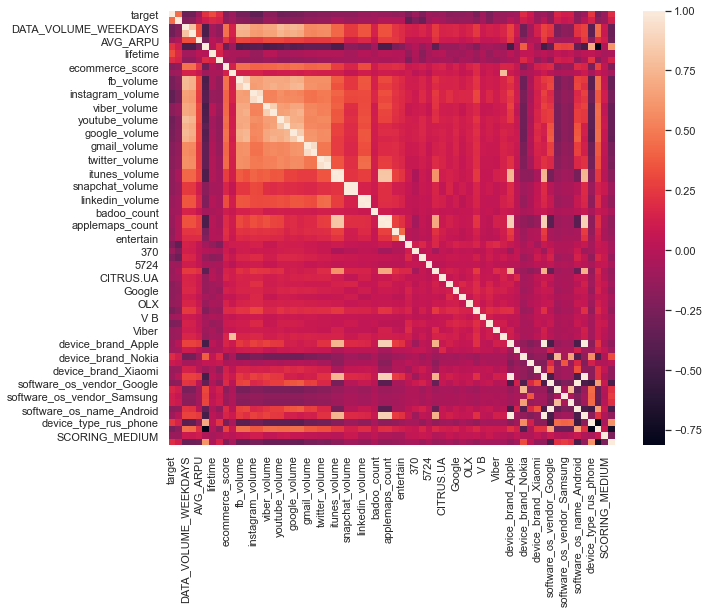

In [57]:
sns.heatmap(df_subset_trunc_non_corr.corr(method='kendall'))

Remove columns that correlates significantly (0.7-0.9) with other columns (that in turn corralates more with target) 

In [66]:
df_subset_trunc_non_corr_last_chance = df_subset_trunc_non_corr.drop(['DATA_VOLUME_WEEKENDS', 'intagram_count', 'device_type_rus_phone', 'software_os_vendor_Google', 'software_os_vendor_Apple', 'itunes_count'], axis=1)
df_subset_trunc_non_corr_last_chance.head()
df_subset_trunc_non_corr_last_chance.replace(np.nan, 0, inplace=True)
df_subset_trunc_non_corr_last_chance.to_csv('age_final_numeric_corr_2.csv', index=False)

In [67]:
df_subset_trunc_non_corr_last_chance.shape

(28430, 60)

In [68]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer
labels= df_subset_trunc_non_corr_last_chance['target']
lb = LabelBinarizer()
bin_labels = lb.fit_transform(labels)
bin_labels

array([[0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]])

In [61]:
import category_encoders as ce

enc=ce.OneHotEncoder().fit(labels.astype(str))
y_onehot=enc.transform(labels.astype(str))
y_onehot


,target_1,target_2,target_3,target_4,target_5,target_6
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
28425,1,0,0,0,0,0
28426,0,0,0,1,0,0
28427,1,0,0,0,0,0
28428,0,0,0,0,0,1


In [62]:
binar_target_df = y_onehot.join(df_subset_trunc_non_corr_last_chance)

In [63]:
binar_target_df.corr(method ='kendall')

,target_1,target_2,target_3,target_4,target_5,target_6,target,CALCULATION_METHOD_ID,DATA_VOLUME_WEEKDAYS,AVG_ARPU,phone_value,lifetime,how_long_same_model,ecommerce_score,MONOBANK,fb_volume,fb_count,instagram_volume,viber_volume,viber_count,youtube_volume,youtube_count,google_volume,google_count,gmail_volume,gmail_count,twitter_volume,twitter_count,itunes_volume,itunes_count,snapchat_volume,snapchat_count,linkedin_volume,linkedin_count,badoo_count,applemaps_volume,applemaps_count,cafe,entertain,1020,370,4659,5724,Apple,CITRUS.UA,FACEBOOK,Google,Instagram,OLX,Telegram,V B,VKcom,Viber,monobank,device_brand_Apple,device_brand_Meizu,device_brand_Nokia,device_brand_Samsung,device_brand_Xiaomi,software_os_vendor_Apple,software_os_vendor_Nokia,software_os_vendor_Samsung,software_os_name_40,software_os_name_Android,software_os_name_iOS,device_type_rus_smartphone,SCORING_MEDIUM,SCORING_VERY LOW
target_1,1.000000,-0.195414,-0.198341,-0.198341,-0.177468,-0.184628,-0.358913,-0.287427,0.211076,0.092869,-0.127446,-0.233343,-0.099513,0.153435,0.154672,0.175601,0.179738,0.280814,0.117581,0.123876,0.172718,0.160389,0.164300,0.153958,0.135876,0.128239,0.151617,0.152046,0.150968,0.150930,0.118013,0.117914,0.111143,0.111135,0.130019,0.124662,0.124131,0.102086,0.071463,0.177609,0.080708,0.145005,0.054415,0.137811,0.108501,0.142793,0.112623,0.096371,0.123384,0.247218,0.060196,0.185793,0.091835,0.182858,0.111001,0.076275,-0.092209,-0.064925,0.045976,0.111001,-0.083765,-0.050873,-0.067657,0.041916,0.111001,0.126531,0.102995,-0.098932
target_2,-0.195414,1.000000,-0.217439,-0.217439,-0.194557,-0.202406,0.072027,0.076949,0.014597,0.039687,-0.068046,0.161644,0.022792,0.044582,-0.021961,0.048293,0.043091,-0.038762,0.071454,0.068742,0.022576,0.024455,0.036009,0.042306,0.044674,0.045453,0.038462,0.039873,-0.002932,-0.002938,-0.025349,-0.025388,0.025839,0.025993,-0.035150,-0.003054,-0.003224,0.057674,0.058467,-0.057414,-0.001857,-0.050086,-0.028630,-0.020759,0.022604,-0.052896,-0.011296,-0.049643,-0.002133,-0.059490,-0.009529,-0.067541,-0.013121,-0.024651,0.005534,-0.020934,-0.044405,0.031723,0.012769,0.005534,-0.040562,-0.028919,-0.022704,0.066705,0.005534,0.075002,-0.041626,-0.074198
target_3,-0.198341,-0.217439,1.000000,-0.220696,-0.197471,-0.205438,0.596577,0.310779,-0.289811,-0.144810,0.286509,0.106425,0.151799,-0.220065,-0.084470,-0.286342,-0.285836,-0.276868,-0.246730,-0.248108,-0.272565,-0.266011,-0.272240,-0.266278,-0.228236,-0.224533,-0.212209,-0.212128,-0.156330,-0.156443,-0.103884,-0.103962,-0.135045,-0.135016,-0.061557,-0.124680,-0.124365,-0.144521,-0.125346,-0.157455,-0.095563,-0.146906,-0.061366,-0.116129,-0.127756,-0.095901,-0.132519,-0.081446,-0.132238,-0.175529,-0.080837,-0.144747,-0.096962,-0.104934,-0.115390,-0.069294,0.227567,0.056333,-0.111557,-0.115390,0.189417,0.129620,0.140335,-0.231387,-0.115390,-0.329134,-0.075307,0.290499
target_4,-0.198341,-0.217439,-0.220696,1.000000,-0.197471,-0.205438,0.333253,0.233685,-0.118082,-0.026565,0.032309,0.197759,0.065811,-0.102657,-0.061129,-0.096419,-0.099575,-0.156594,-0.058357,-0.063222,-0.106148,-0.098823,-0.090579,-0.083068,-0.075671,-0.072209,-0.073947,-0.073774,-0.070388,-0.070119,-0.080910,-0.080977,-0.055934,-0.056163,-0.057689,-0.049512,-0.049435,-0.041506,-0.044665,-0.122260,-0.050885,-0.107168,-0.047693,-0.054136,-0.039697,-0.082806,-0.071812,-0.076167,-0.072452,-0.109190,-0.041280,-0.115601,-0.045131,-0.071622,-0.038944,-0.029994,0.029951,0.046382,-0.037109,-0.038944,0.038461,0.023440,0.029210,-0.007426,-0.038944,-0.025861,-0.037811,-0.005184
target_5,-0.177468,-0.194557,-0.197471,-0.197471,1.000000,-0.183818,-0.553759,-0.262216,0.113158,-0.027742,-0.035828,-0.282381,-0.118668,0.014214,-0.009909,0.071090,0.074484,0.148293,0.007462,0.012801,0.118499,0.121693,0.085357,0.073905,0.037267,0.039138,0.025728,0.021350,0.018608,0.017708,0.106524,0.106879,-0.018038,-0.018277,0.020123,-0.011801,-0.011889,-0.079146,-0.056376,0.123093,0.043756,0.163126,0.095100,-0.003916,-0.010315,0.126981,0.092393,